<a href="https://colab.research.google.com/github/SoujanyaS257/ComputerVision/blob/main/Exponential_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload a color image file.


Saving baboon.jpg to baboon (1).jpg

Successfully uploaded 'baboon (1).jpg'

Original Image:


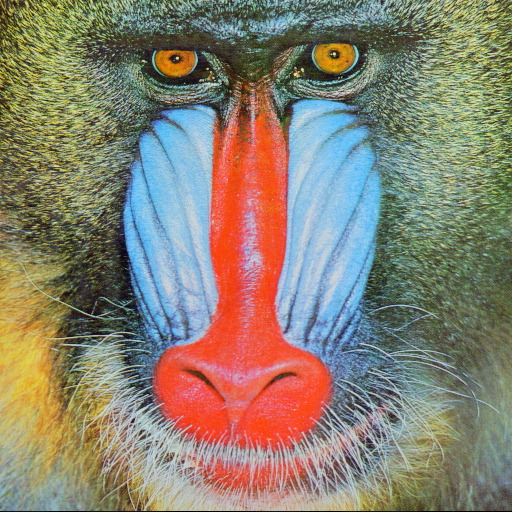


Image with Exponential Noise (a=0.05):


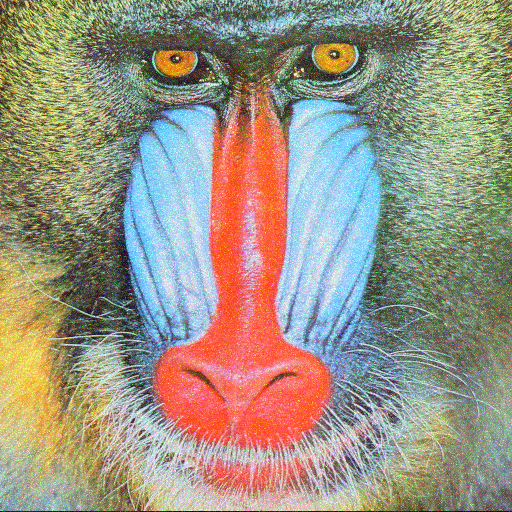

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow # Use cv2_imshow for Colab

def add_exponential_noise(image, a=0.05):
    """
    Adds exponential noise to an image.

    Args:
        image (np.ndarray): The input image.
        a (float): The 'a' parameter for the exponential distribution.

    Returns:
        np.ndarray: The image with added exponential noise.
    """
    scale = 1 / a
    # Generate noise with the same shape as the color image (height, width, 3)
    noise = np.random.exponential(scale, image.shape).astype(np.float32)

    # Add the noise to the image
    noisy_image = image.astype(np.float32) + noise

    # Clip the pixel values to the valid range [0, 255]
    np.clip(noisy_image, 0, 255, out=noisy_image)

    # Convert back to the original data type (uint8)
    return noisy_image.astype(image.dtype)

# --- Main execution for Colab ---

# Step 1: Prompt user to upload a file
print("Please upload a color image file.")
uploaded = files.upload()

# Check if a file was uploaded
if not uploaded:
    print("\nNo file was uploaded. Please run the cell again.")
else:
    # Get the filename of the uploaded file
    filename = next(iter(uploaded))
    print(f"\nSuccessfully uploaded '{filename}'")

    # Step 2: Read the uploaded image data in color
    file_bytes = np.frombuffer(uploaded[filename], np.uint8)

    # *** THIS IS THE KEY CHANGE ***
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

    if image is None:
        print("Error: Could not read the image file. Please ensure it's a valid image.")
    else:
        # Step 3: Add noise to the image
        a_param = 0.05
        noisy_image = add_exponential_noise(image, a=a_param)

        # Step 4: Visualize the results
        print("\nOriginal Image:")
        cv2_imshow(image)

        print(f"\nImage with Exponential Noise (a={a_param}):")
        cv2_imshow(noisy_image)